# Linear Regression

The linear regression is the simplest way to fit a model to a set of data points, assuming that the relationship can be approximated by a simple line, i.e. y = m*x + b.

This notebook shows how to use linear regression using the Scikit-learn package and consists of two exercises
   * first, a set of artificial data is generated according to a simple straight line, i.e. y = m*x +b
   * second, we still generate data according to y = m*x + b but now generate a large sample.

In both cases, a noise term generated by a Gaussian random number is added to each point on the y-axis to randomly shift them a bit away from the "true" slope y=1.


## Imports and setup
First, we need to import the relevant packages. 
This exercise uses:
   * The Normal (Gaussian) Distribution from SciPy
   * Linear Regression from Scikit-Learn
   * Regularisation from Scikit-Learn
   


In [1]:
%pylab inline
# large figures
rcParams['figure.figsize'] = 8, 6

# imports
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LinearRegression


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Exericse 1

In this exercise we first generate a simple sample according to y = m*x + b.
The data are evenly distributed on the x-axis.
The resulting dataset is then modelled using a linear regression.

## Generate the data sample

In [2]:
def generate_simple_data(x_min, x_max, noise):
    n_samples = int(x_max - x_min)+1
    x = np.linspace(x_min, x_max, n_samples )
    y = []
    for i in x:
        #make the numbers "wiggle" a bit by adding some "Gaussian Noise"
        y.append(i+float(norm.rvs(scale=noise, size=1)))
    #re-shape the data on the x-axis into the format the linear regression expects    
    return x[:, np.newaxis],y

C:\Users\bzenz\AppData\Local\Temp\ipykernel_28824\474175764.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y.append(i+float(norm.rvs(scale=noise, size=1)))


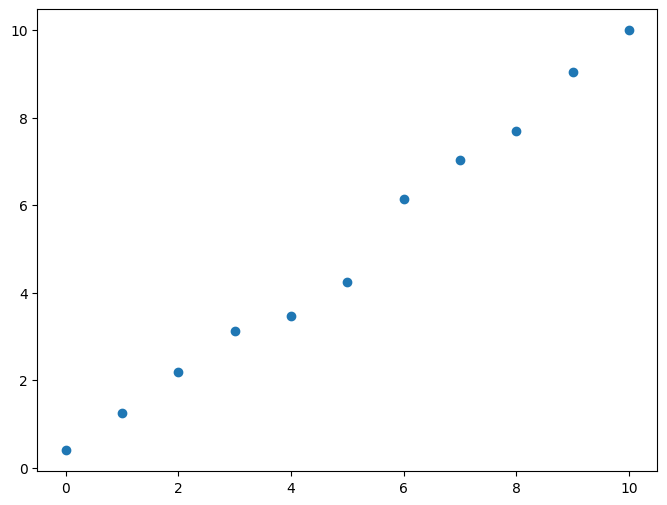

In [3]:
#generate the data
x,y = generate_simple_data(0,10,0.5)

#show the generated sample
plt.scatter(x,y)
plt.show()

## Model the data using a linear regression

In this exercise we use the simplest model, the linear regression which is provided by the package scikit-learn.
We first instantiate an instance of the "LinearRegression" model and allow the intercept to be included in the fit.

## Exercise:
   * Perform the liniear regression using the ```LinearRegression``` method from scikit-learn
   * Print the regression coefficient you have obtained
   * Draw a scatter-plot of the artificial data and add the true linear model (according to which the artificial data was created) and the result of the linear regression.

the fitted slope is 0.965704
the fitted intercept is 0.138050


C:\Users\bzenz\AppData\Local\Temp\ipykernel_28824\517235576.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("the fitted slope is %lf" % lm.coef_)


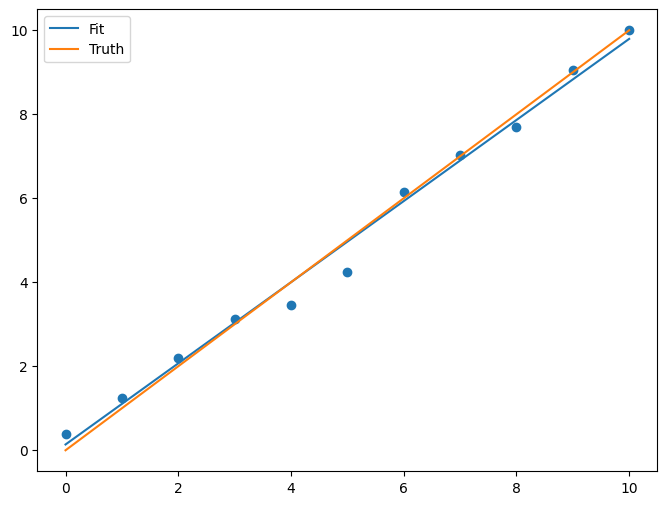

In [4]:
#create an instance of the LinearRegression object which will perform the fit
lm = LinearRegression(fit_intercept=True)

# now fit the data using the model
lm.fit(x,y)
print("the fitted slope is %lf" % lm.coef_)
print("the fitted intercept is %lf"% lm.intercept_)

#now use the fitted model to create a line representing the fit
x_space = np.linspace(np.min(x), np.max(x))
y_pred  = lm.predict(x_space[:, np.newaxis])

#create a similar line with the original model which we have used to create the data with (without the extra noise)
true_slope = 1.0
y_true  = true_slope*x_space


plt.scatter(x,y)
plt.plot(x_space, y_pred, label='Fit')
plt.plot(x_space, y_true, label='Truth')
plt.legend()
plt.show()

==================================================================================================================

# Second exercise

In the second exercise we use y = m*x + b as generating function again but this time we generate more data. Also, the data on the x-axis is now randomly distributed as well instead of the evenly spaced data in the first exercise.

Define a small function which generates test data according to a linear model in the following way:
   * x-axis: Random numbers drawn from a Gaussian (Normal) distribution with default parameters (mean=0, sigma = 1)
   * y-axis: x-value times slope plus a noise term (Gaussian random numbers)
   
The input parameters to this function are:
   * The number of samples to generate
   * slope
   * noise

The output of the function is:
  * array of x values
  * array of y values

In [5]:
def generate_test_data(slope, noise, n_samples):
    x = norm.rvs(size=n_samples)
    y = slope * x + norm.rvs(scale=noise, size=n_samples)
    return x[:, np.newaxis], y

Test the function generating artificial data by:
   * generate 100 samples with slope 1.0 and noise 1.0
   * create a scatterplot of x vs y values
   * create a histogram of the marginal distributions, i.e. of the x and y vlaues

In [6]:
true_slope = 1.0
noise_level = 1
n_samples = 100

x, y = generate_test_data(true_slope, noise_level, n_samples)

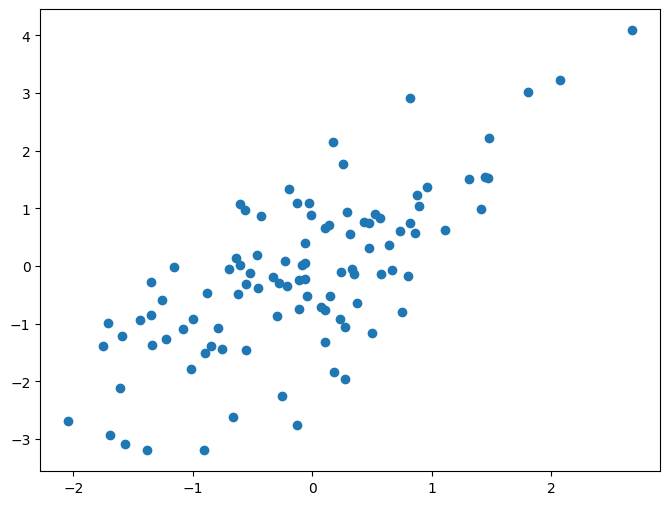

In [7]:
#show the generated sample
plt.scatter(x,y)
plt.show()

In this exercise we created the data such that each data point on the x-axis is taken as a Gaussian random number and each corresponding point on the y-axis is the value of the x-axis with some added Gaussian noise.

Hence the marginal distribution of the x- and y-values should be Gaussian distributions,i.e. the projections of all points onto the x- and y-axis should follow a Gaussian distribution.

We check this by creating a histogram of the x and y values and overlay them.

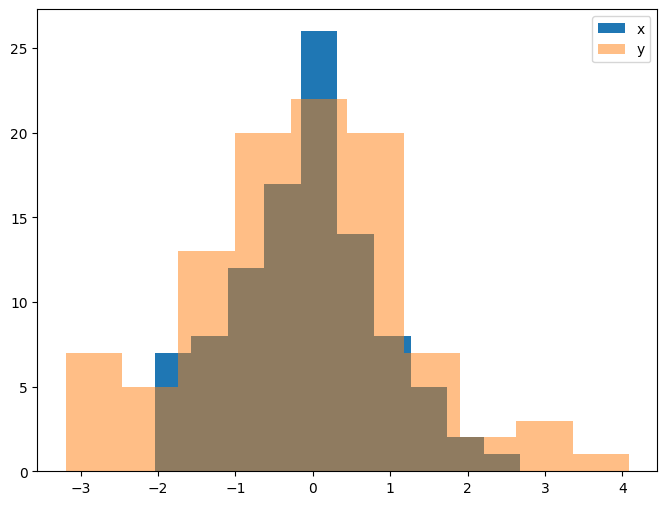

In [8]:
# now show the distribution of data in x and y 
plt.hist(x, label='x')
plt.hist(y, alpha = 0.5, label='y')
plt.legend()
plt.show()

## Linear Regression 

We now perform the linear regression similar to above

## Exercise
Use the LinearRegression method from Scikit-Learn to fit a linear model to the artificial data.
In a first step, set ```fit_intercept=False```.
   * Perform the linear regression
   * Print the regression coefficient you have obtained
   * Draw a scatter-plot of the artificial data and add the true linear model (according to which the artificial data was created) and the result of the linear regression.


the fitted slope is 1.115929
the fitted intercept is 0.000000


C:\Users\bzenz\AppData\Local\Temp\ipykernel_28824\3000357492.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("the fitted slope is %lf" % lm.coef_)


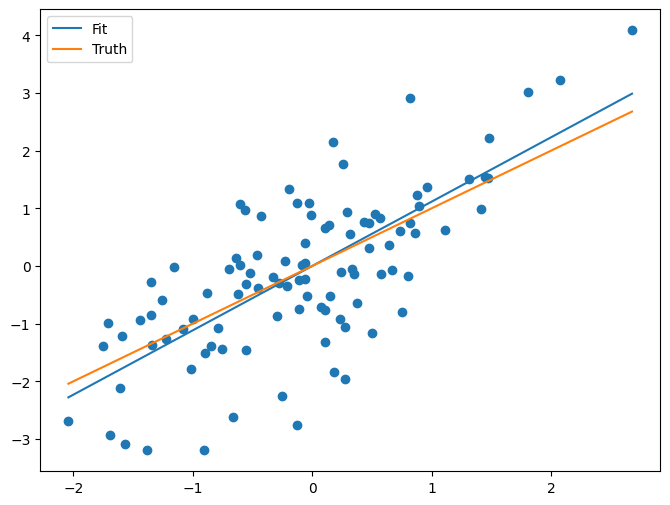

In [9]:
lm = LinearRegression(fit_intercept=False)
lm.fit(x,y)
print("the fitted slope is %lf" % lm.coef_)
print("the fitted intercept is %lf"% lm.intercept_)

plt.scatter(x,y)
x_space = np.linspace(np.min(x), np.max(x))
plt.plot(x_space, lm.predict(x_space[:, np.newaxis]), label='Fit')
plt.plot(x_space, true_slope*x_space, label='Truth')
plt.legend()
plt.show()